# Khai báo thư viện

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

# Data preprocessing

In [2]:
df = pd.read_excel('Vietnam Airlines JSC (HVN) 2018-2022.xlsx',sheet_name=0)
df.head()

,Chỉ tiêu,Quý 1- 2018,Quý 2- 2018,Quý 3- 2018,Quý 4- 2018,Quý 1- 2019,Quý 2- 2019,Quý 3- 2019,Quý 4- 2019,Quý 1- 2020,...,Quý 3- 2020,Quý 4- 2020,Quý 1- 2021,Quý 2- 2021,Quý 3- 2021,Quý 4- 2021,Quý 1- 2022,Quý 2- 2022,Quý 3- 2022,Quý 4- 2022
0,1. Doanh thu bán hàng và cung cấp dịch vụ,2.459163e+13,2.335216e+13,2.556004e+13,2.409213e+13,2.575230e+13,2.436312e+13,2.563057e+13,2.330840e+13,1.893772e+13,...,7.620709e+12,8.262172e+12,7.528056e+12,6.598388e+12,4.754034e+12,9.212977e+12,1.168338e+13,1.842919e+13,2.126668e+13,1.957326e+13
1,2. Các khoản giảm trừ doanh thu,1.800890e+11,2.064928e+11,1.832129e+11,2.047484e+11,2.161247e+11,2.234349e+11,2.121873e+11,2.250996e+11,1.247315e+11,...,1.850851e+10,5.978886e+10,6.790898e+10,6.158745e+10,1.858853e+10,3.403115e+10,6.325993e+10,1.055320e+11,1.103854e+11,1.021538e+11
2,3. Doanh thu thuần về bán hàng và cung cấp dịc...,2.441154e+13,2.314567e+13,2.537682e+13,2.388738e+13,2.553618e+13,2.413969e+13,2.541838e+13,2.308330e+13,1.881299e+13,...,7.602201e+12,8.202383e+12,7.460147e+12,6.536800e+12,4.735446e+12,9.178946e+12,1.162012e+13,1.832366e+13,2.115629e+13,1.947111e+13
3,4. Giá vốn hàng bán,2.078689e+13,2.008503e+13,2.228801e+13,2.145419e+13,2.152071e+13,2.170355e+13,2.211002e+13,2.168087e+13,1.944506e+13,...,1.080303e+13,7.686981e+12,1.132923e+13,1.003415e+13,7.746602e+12,1.028700e+13,1.321493e+13,1.870055e+13,2.099129e+13,2.029869e+13
4,5. Lợi nhuận gộp về bán hàng và cung cấp dịch ...,3.624645e+12,3.060638e+12,3.088814e+12,2.433185e+12,4.015463e+12,2.436139e+12,3.308366e+12,1.402430e+12,-6.320703e+11,...,-3.200833e+12,5.154024e+11,-3.869085e+12,-3.497354e+12,-3.011156e+12,-1.108058e+12,-1.594804e+12,-3.768981e+11,1.650034e+11,-8.275829e+11


In [3]:
df.isnull().sum()

Chỉ tiêu       0
Quý 1- 2018    1
Quý 2- 2018    1
Quý 3- 2018    1
Quý 4- 2018    1
Quý 1- 2019    1
Quý 2- 2019    1
Quý 3- 2019    1
Quý 4- 2019    1
Quý 1- 2020    2
Quý 2- 2020    1
Quý 3- 2020    1
Quý 4- 2020    1
Quý 1- 2021    1
Quý 2- 2021    1
Quý 3- 2021    1
Quý 4- 2021    1
Quý 1- 2022    1
Quý 2- 2022    1
Quý 3- 2022    1
Quý 4- 2022    1
dtype: int64

In [4]:
df.dropna(inplace=True,axis=0)

In [5]:
df.duplicated().sum()

0

# Trực quan hóa dữ liệu **KẾT QUẢ KINH DOANH**

#### Câu hỏi đặt ra: Giai đoạn xuất hiện dịch COVID-19 cho đến nay đã ảnh hưởng như thế nào đến lợi nhuận sau thuế của Vietnam Airlines?

In [6]:
df_kqkd = df[df.index.isin([2,18])].set_index('Chỉ tiêu').T
df_kqkd.reset_index(inplace=True)
df_kqkd.columns = ['Quý báo cáo','Doanh thu thuần','Lợi nhuận sau thuế']
df_kqkd =  df_kqkd.melt(id_vars='Quý báo cáo',var_name='Chỉ tiêu',value_name='Giá trị')
df_kqkd.set_index("Quý báo cáo",inplace=True)
df_kqkd.head()

,Chỉ tiêu,Giá trị
Quý báo cáo,,
Quý 1- 2018,Doanh thu thuần,2.441154e+13
Quý 2- 2018,Doanh thu thuần,2.314567e+13
Quý 3- 2018,Doanh thu thuần,2.537682e+13
Quý 4- 2018,Doanh thu thuần,2.388738e+13
Quý 1- 2019,Doanh thu thuần,2.553618e+13


Text(0.1, 0.95, 'Doanh thu thuần và Lợi nhuận sau thuế trong giai đoạn 2018 - 2022')

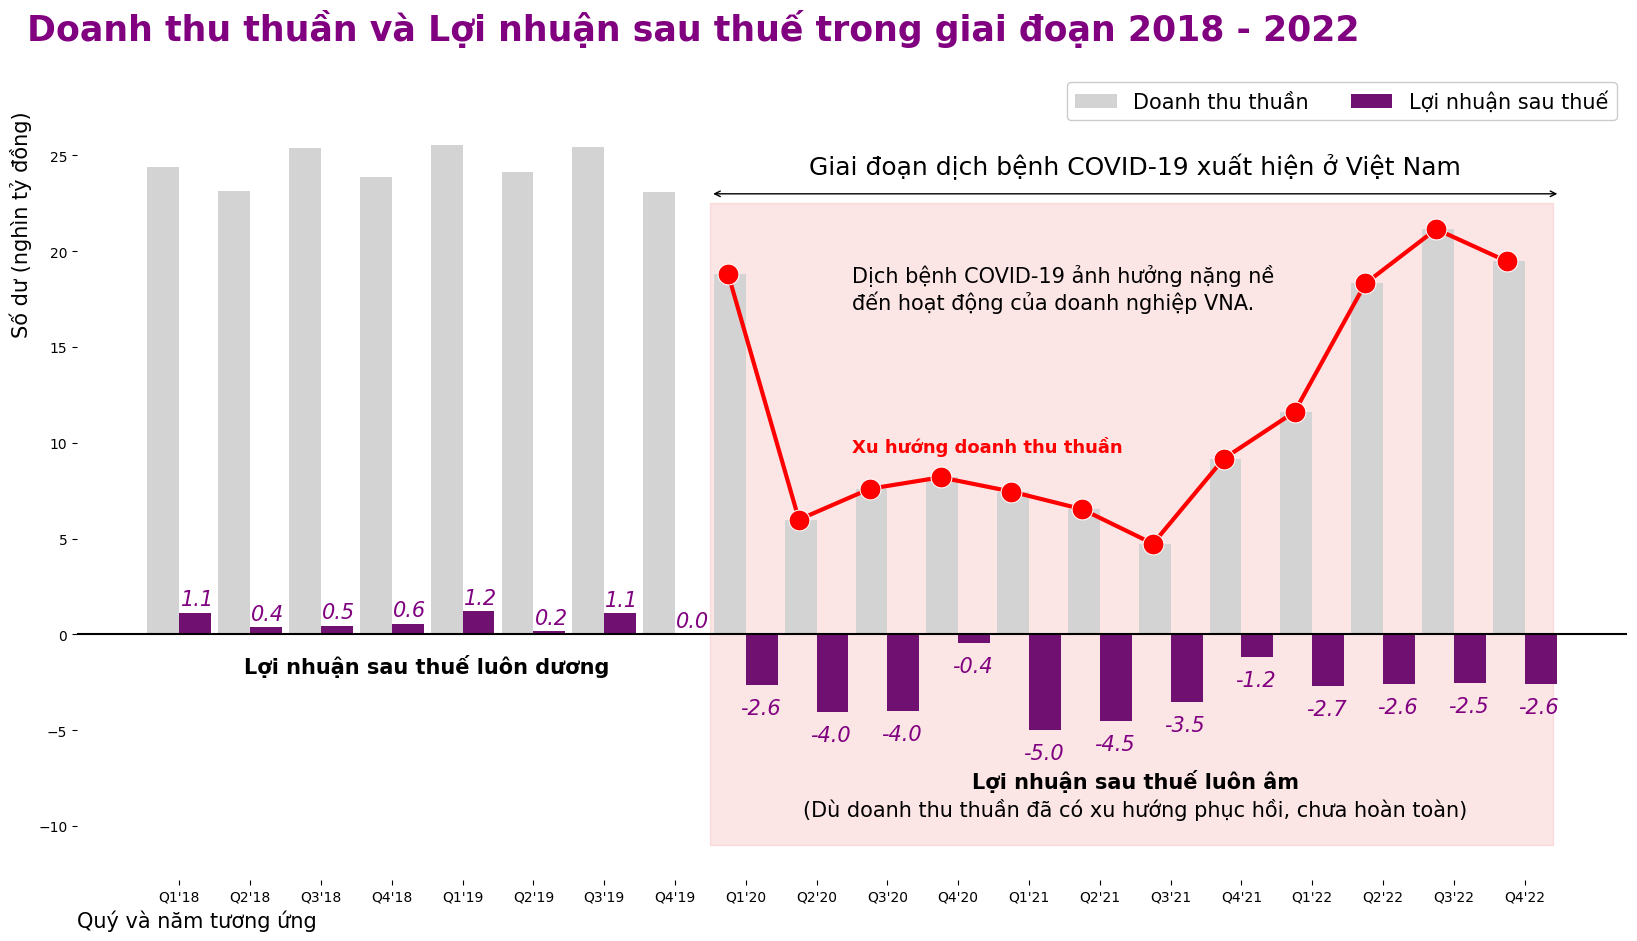

In [7]:
# Quy ước
dvt = 10**12
width = 0.9
c = ['lightgray']+['purple'] 

# Chuẩn bị biến
x = ["Q{}\'{}".format(x[4],x[-2:]) for x in df_kqkd.index]
y = df_kqkd['Giá trị']/dvt

# Vẽ biểu đồ
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)

ax.fill_between(np.arange(7.5,19.5,0.1),-11,22.5,color='lightcoral',alpha=0.2)

sns.barplot(x = x,
            y = y,
            hue = df_kqkd['Chỉ tiêu'],
            ax = ax,palette=c,
            width = width)
sns.lineplot(x = np.arange(7.75,19.75,1),
             y = df_kqkd[df_kqkd['Chỉ tiêu']=='Doanh thu thuần']['Giá trị'][8:]/dvt,
              lw = 3,
              color='red',
             marker='o',
              ms = 15,
             )

for spine in ['top','right','bottom','left']:
    ax.spines[spine].set_visible(False)
ax.axhline(0,color='black')
ax.legend(loc='upper right',ncols=2,facecolor='white',framealpha=1,fontsize=15,bbox_to_anchor=(1,1.05))
ax.set_xlabel('Quý và năm tương ứng',loc='left',fontsize=15)
ax.set_ylabel('Số dư (nghìn tỷ đồng)',loc='top',fontsize=15)


# Kể câu chuyện
texts = df_kqkd[df_kqkd['Chỉ tiêu']=='Lợi nhuận sau thuế']['Giá trị']/dvt
for idx, text in zip([idx for idx in np.arange(len(texts))],texts):
    if text < 0:
        ax.annotate('{:.1f}'.format(text),xy=(idx+0.2,text-0.7),color='purple',ha='center',va='top',fontsize=15,fontstyle='italic')
    else:
        ax.annotate('{:.1f}'.format(text),xy=(idx+0.25,text+1.2),color='purple',ha='center',va='top',fontsize=15,fontstyle='italic')
    
ax.annotate('Lợi nhuận sau thuế luôn âm',xy=(13.5,-8),fontsize=15,color='black',fontweight='bold',ha='center')

ax.annotate('Lợi nhuận sau thuế luôn dương',xy=(3.5,-2),fontsize=15,color='black',fontweight='bold',ha='center')

ax.annotate('(Dù doanh thu thuần đã có xu hướng phục hồi, chưa hoàn toàn)',xy=(13.5,-9.5),fontsize=15,color='black',ha='center')

ax.annotate('Giai đoạn dịch bệnh COVID-19 xuất hiện ở Việt Nam', xy=(13.5,24),ha='center',color='black',fontsize=18)

ax.annotate("",arrowprops=dict(arrowstyle='<->',color='black'),xy=(7.5,23),xytext=(19.5,23))

ax.annotate("Dịch bệnh COVID-19 ảnh hưởng nặng nề\nđến hoạt động của doanh nghiệp VNA.",color='black',xy = (9.5,17),ha='left',fontsize=15)

ax.annotate("Xu hướng doanh thu thuần",color='red',xy=(9.5,9.5),fontsize=13,fontweight='bold')

fig.text(0.1,0.95,'Doanh thu thuần và Lợi nhuận sau thuế trong giai đoạn 2018 - 2022',color='Purple',fontsize=25,fontweight='bold')
#fig.text(0.1,0,'Nguồn dữ liệu: cafef.vn',color='Purple',fontsize=25)
#fig.text(0.1,-0.05,'@2023 Nguyễn Phú Thành',color='Purple',fontsize=25)

# Trực quan hóa dữ liệu CÂN ĐỐI KẾ TOÁN
#### Câu hỏi đặt ra: Tỷ lệ tài sản ngắn hạn bị thay đổi thế nào trong giai đoạn COVID?

In [8]:
df = pd.read_excel('Vietnam Airlines JSC (HVN) 2018-2022.xlsx',sheet_name=1)
df.head()

,Chỉ tiêu,Quý 1- 2018,Quý 2- 2018,Quý 3- 2018,Quý 4- 2018,Quý 1- 2019,Quý 2- 2019,Quý 3- 2019,Quý 4- 2019,Quý 1- 2020,...,Quý 3- 2020,Quý 4- 2020,Quý 1- 2021,Quý 2- 2021,Quý 3- 2021,Quý 4- 2021,Quý 1- 2022,Quý 2- 2022,Quý 3- 2022,Quý 4- 2022
0,TÀI SẢN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A- TÀI SẢN NGẮN HẠN,2.375820e+13,2.305180e+13,2.177808e+13,2.012215e+13,2.329439e+13,2.317508e+13,2.097105e+13,1.910011e+13,1.491380e+13,...,9.493367e+12,8.612129e+12,7.862671e+12,8.198978e+12,1.475678e+13,1.142544e+13,1.278218e+13,1.622341e+13,1.303454e+13,1.231571e+13
2,I. Tiền và các khoản tương đương tiền,1.067666e+13,7.582330e+12,5.361702e+12,3.652867e+12,7.515194e+12,8.055084e+12,5.090254e+12,5.054893e+12,2.467969e+12,...,2.618471e+12,1.646930e+12,1.594848e+12,1.288654e+12,6.310452e+12,1.713827e+12,2.457893e+12,3.304553e+12,3.040362e+12,2.485014e+12
3,1. Tiền,2.562202e+12,2.276272e+12,2.263193e+12,3.077567e+12,2.397826e+12,2.247025e+12,2.106320e+12,1.743567e+12,1.463760e+12,...,8.024825e+11,7.809344e+11,9.378533e+11,7.137858e+11,1.741593e+12,8.353066e+11,2.006993e+12,2.583023e+12,2.417162e+12,2.344014e+12
4,2. Các khoản tương đương tiền,8.114463e+12,5.306058e+12,3.098509e+12,5.753000e+11,5.117368e+12,5.808059e+12,2.983934e+12,3.311326e+12,1.004208e+12,...,1.815988e+12,8.659951e+11,6.569950e+11,5.748680e+11,4.568860e+12,8.785200e+11,4.509000e+11,7.215300e+11,6.232000e+11,1.410000e+11


In [9]:
df_ts = df[df.index.isin([1,27])].set_index('Chỉ tiêu').T
df_ts.reset_index(inplace=True)
df_ts.columns = ['Quý báo cáo','Tài sản ngắn hạn','Tài sản dài hạn']
df_ts.set_index("Quý báo cáo",inplace=True)
df_ts2 = df_ts.divide(df_ts.sum(axis=1),axis=0)*100
df_ts2.head()

,Tài sản ngắn hạn,Tài sản dài hạn
Quý báo cáo,,
Quý 1- 2018,26.699119,73.300881
Quý 2- 2018,26.751383,73.248617
Quý 3- 2018,25.822133,74.177867
Quý 4- 2018,24.484880,75.515120
Quý 1- 2019,27.791601,72.208399


In [10]:
x = ["Q{}\'{}".format(x[4],x[-2:]) for x in df_ts.index]
y1a = df_ts['Tài sản ngắn hạn']
y1b = df_ts['Tài sản dài hạn']
y2a = df_ts2["Tài sản ngắn hạn"]
y2b = df_ts2['Tài sản dài hạn']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1560\1651215430.py:31: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(20)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1560\1651215430.py:33: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(20)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1560\1651215430.py:75: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(15)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1560\1651215430.py:83: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(15)


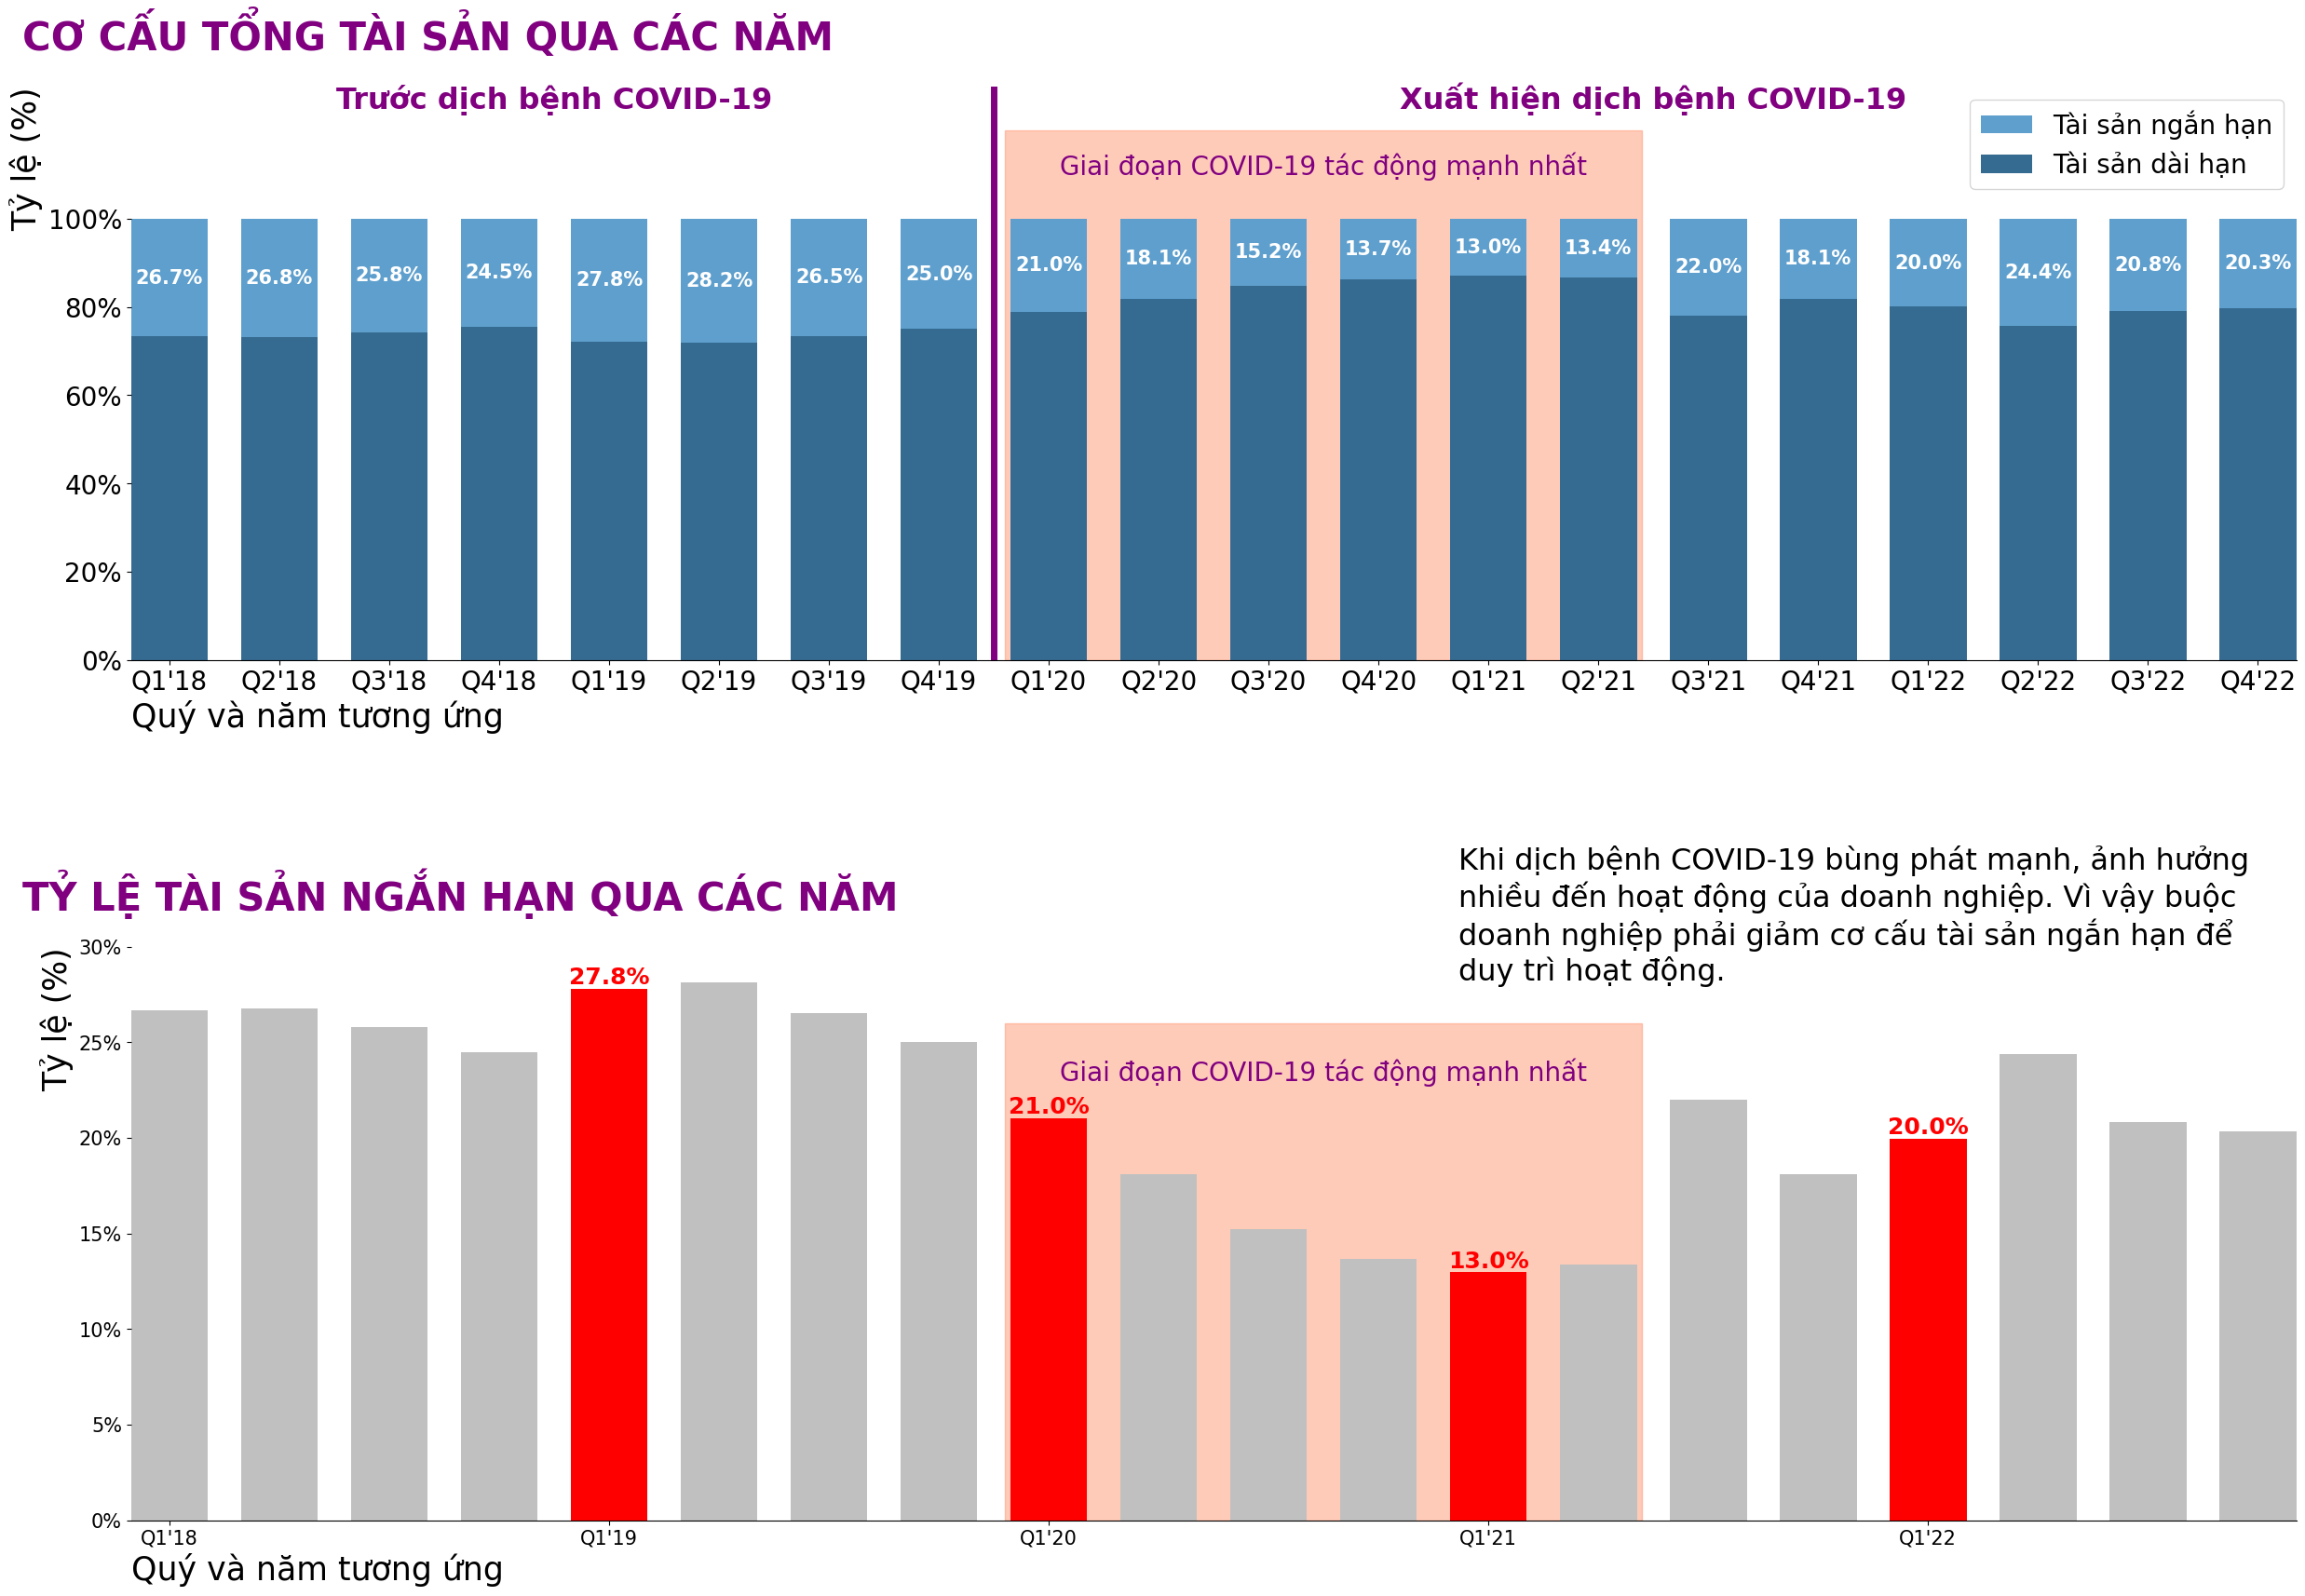

In [11]:
width = 0.7
c1= sns.color_palette('Blues_d',n_colors=2)
fig = plt.figure(figsize=(30,20))
# Axes 1
ax1 = fig.add_subplot(211)
ax1.fill_between(np.arange(7.6,13.5,0.1),0,120,color='coral',alpha=0.4)
bar1 = ax1.bar(x,
        y2a,
        bottom=y2b,
        color=c1[0],
        label='Tài sản ngắn hạn',
        width=width)
bar2 = ax1.bar(x,
        y2b,
        color=c1[1],
        label='Tài sản dài hạn',
        width=width)
plt.legend(loc='upper right',fontsize=20)
for spine in ['top','left','right']:
    ax1.spines[spine].set_visible(False)

ax1.set_title('CƠ CẤU TỔNG TÀI SẢN QUA CÁC NĂM',loc='left',color='purple',fontsize=30,fontweight='bold',x=-0.05,y=1.05)

ax1.set_ylabel('Tỷ lệ (%)',loc='top',fontsize=25)
ax1.set_xlabel('Quý và năm tương ứng',loc='left',fontsize=25)

ax1.set_yticks(np.arange(0,120,20))
ax1.set_yticklabels(['{}%'.format(y) for y in ax1.get_yticks()])

for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)


        
ax1.axvline(7.5,0,150,color='purple',lw=5)
ax1.margins(0,0.3)

for i, text,bottom in zip(np.arange(0,20,1),y2a, y2b):
    ax1.annotate('{:.1f}%'.format(text),xy=(i,bottom+(text/2)),ha='center',va='center',color='white',fontsize=15,fontweight='bold')
    

    
ax1.annotate('Trước dịch bệnh COVID-19',xy=(3.5,125),ha='center',fontsize=23,color='purple',fontweight='bold')

ax1.annotate('Xuất hiện dịch bệnh COVID-19',xy=(13.5,125),ha='center',fontsize=23,color='purple',fontweight='bold')

ax1.annotate('Giai đoạn COVID-19 tác động mạnh nhất',xy=(10.5,110),ha='center',fontsize=20,color='purple')



# Axes2
ax2 = fig.add_subplot(212)
ax2.fill_between(np.arange(7.6,13.5,0.1),0,26,color='coral',alpha=0.4)

c1 = ['silver']+['silver','silver','silver','red']*4

ax2.bar(x,
        y2a,
        color=c1,
        width=width)
for spine in ['top','left','right']:
    ax1.spines[spine].set_visible(False)

ax2.set_title('TỶ LỆ TÀI SẢN NGẮN HẠN QUA CÁC NĂM',loc='left',color='purple',fontsize=30,x=-0.05,y=1.05,fontweight='bold')

ax2.margins(0,0)

ax2.set_yticks(ax2.get_yticks(),
               ['{:.0f}%'.format(y) for y in ax2.get_yticks()])


for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
    
ax2.set_ylabel('Tỷ lệ (%)',loc='top',fontsize=25)
ax2.set_xlabel('Quý và năm tương ứng',loc='left',fontsize=25)

ax2.set_xticks(ax2.get_xticks()[::4],
               ['{}'.format(y) for y in x[::4]])
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for idx, text in zip(np.arange(0,len(y2a),1)[4::4],y2a[4::4]):
    ax2.annotate('{:.1f}%'.format(text),xy=(idx,text),ha='center',va='bottom',color='red',fontsize=18,fontweight='bold')

for spine in ['top','left','right']:
    ax2.spines[spine].set_visible(False)

ax2.annotate('Giai đoạn COVID-19 tác động mạnh nhất',xy=(10.5,23),ha='center',fontsize=20,color='purple')

fig.text(0.6,0.4,'Khi dịch bệnh COVID-19 bùng phát mạnh, ảnh hưởng\nnhiều đến hoạt động của doanh nghiệp. Vì vậy buộc\ndoanh nghiệp phải giảm cơ cấu tài sản ngắn hạn để\nduy trì hoạt động.'
         ,ha='left',fontsize=23,color='black')
plt.subplots_adjust(hspace=0.5)

# Trực quan hóa dữ liệu LƯU CHUYỂN TIỀN TỆ
#### Câu hỏi đặt ra: Lưu chuyển tiền tệ trong kinh doanh diễn ra như thế nào trong giai đoạn dịch COVID-19

In [12]:
df = pd.read_excel('Vietnam Airlines JSC (HVN) 2018-2022.xlsx',sheet_name=2)
df.head()

,Chỉ tiêu,Quý 1- 2018,Quý 2- 2018,Quý 3- 2018,Quý 4- 2018,Quý 1- 2019,Quý 2- 2019,Quý 3- 2019,Quý 4- 2019,Quý 1- 2020,...,Quý 3- 2020,Quý 4- 2020,Quý 1- 2021,Quý 2- 2021,Quý 3- 2021,Quý 4- 2021,Quý 1- 2022,Quý 2- 2022,Quý 3- 2022,Quý 4- 2022
0,I. Lưu chuyển tiền từ hoạt động kinh doanh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1. Lợi nhuận trước thuế,1.429110e+12,1.855208e+12,2.426363e+12,3.239610e+12,1.579060e+12,1.785794e+12,3.291798e+12,3.369746e+12,-2.545115e+12,...,-1.050492e+13,-1.088143e+13,-4.902325e+12,-8.450459e+12,-1.194767e+13,-1.302378e+13,-2.621279e+12,-5.118310e+12,-7.573532e+12,-1.009130e+13
2,2. Điều chỉnh cho các khoản,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,- Khấu hao TSCĐ và BĐSĐT,1.256360e+12,2.498230e+12,3.756010e+12,5.022104e+12,9.365092e+11,2.568777e+12,3.858579e+12,5.145300e+12,1.305305e+12,...,3.777096e+12,2.961149e+12,1.219249e+12,1.201025e+12,1.519711e+12,2.048674e+12,7.931247e+11,1.681273e+12,2.581291e+12,3.535200e+12
4,- Các khoản dự phòng,-1.950029e+10,-6.369603e+09,-8.527951e+09,-3.828161e+10,1.763801e+10,-3.948013e+10,-1.487942e+11,-1.340292e+11,1.516524e+10,...,8.787151e+10,1.373364e+11,2.786562e+10,6.762102e+10,1.763872e+11,2.265013e+11,1.305932e+11,1.736147e+11,-3.532528e+10,-3.803620e+10


In [13]:
df_lctt = df[df.index.isin([19,28,37])].set_index('Chỉ tiêu').T
df_lctt.reset_index(inplace=True)
df_lctt.columns = ['Quý báo cáo','Kinh doanh','Đầu tư','Tài chính']
df_lctt.set_index("Quý báo cáo",inplace=True)
df_lctt.head()

,Kinh doanh,Đầu tư,Tài chính
Quý báo cáo,,,
Quý 1- 2018,4.330510e+12,-4.447287e+10,-1.156513e+12
Quý 2- 2018,7.735488e+12,-2.112844e+12,-5.577982e+12
Quý 3- 2018,8.271325e+12,-2.769824e+12,-7.686789e+12
Quý 4- 2018,8.933710e+12,-3.033477e+12,-9.787361e+12
Quý 1- 2019,2.994718e+12,4.730633e+11,4.452807e+11


In [14]:
x = ["Q{}\'{}".format(x[4],x[-2:]) for x in df_lctt.index]
dvt = 10**12
y1 = df_lctt['Kinh doanh']/dvt
y2 = df_lctt['Đầu tư']/dvt
y3 = df_lctt['Tài chính']/dvt

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1560\1465101873.py:20: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(13)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1560\1465101873.py:22: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(18)


Text(-0.05, 1.05, 'DÒNG TIỀN KINH DOANH QUA CÁC NĂM')

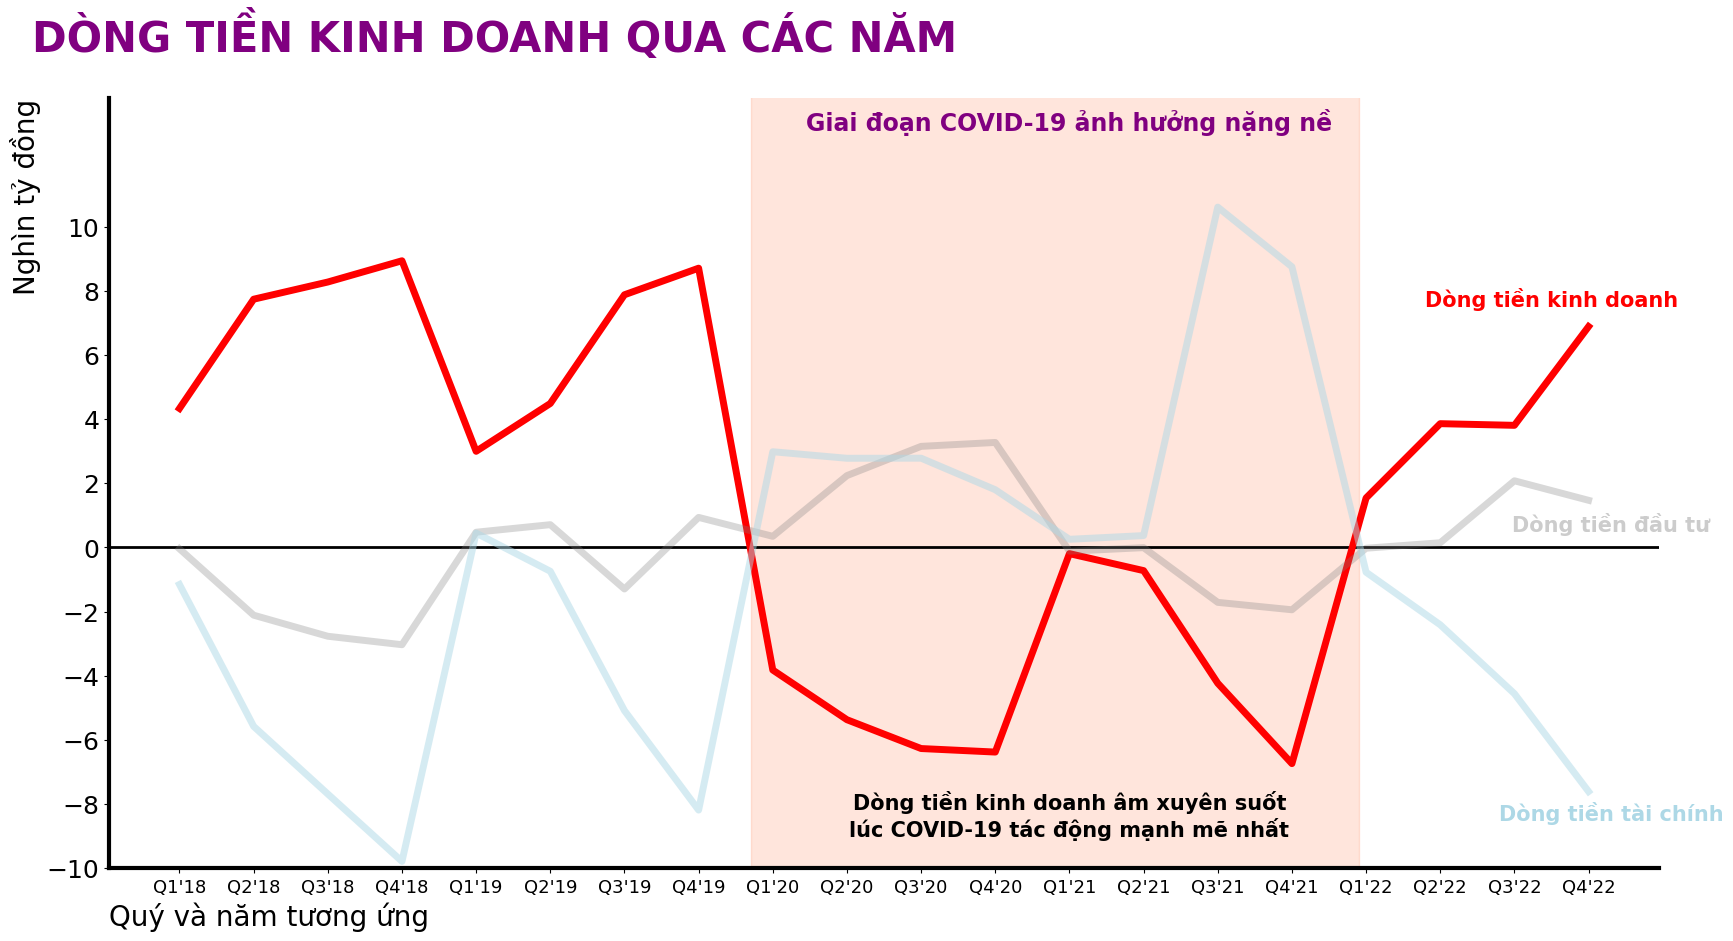

In [15]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)

ax.fill_between(np.arange(7.7,16,0.1),200,-200,alpha=0.2,color='coral')
ax.axhline(0,lw=2,color='black')


ax.plot(x,y1,lw=5,color='red')
ax.plot(x,y2,lw=5,color='gray',alpha=0.3)
ax.plot(x,y3,lw=5,color='lightblue',alpha=0.5)



for spine in ['top','right']:
    ax.spines[spine].set_visible(False)
for spine in ['bottom','left']:
    ax.spines[spine].set_linewidth(3)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)
ax.set_ylim(-10,14)

ax.set_yticks(np.arange(-10,12,2))


ax.set_xlabel('Quý và năm tương ứng',fontsize=20,loc='left')
ax.set_ylabel('Nghìn tỷ đồng',fontsize=20,loc='top')



ax.annotate("Dòng tiền kinh doanh",xy=(18.5,7.5),color='red',fontsize=15,ha='center',fontweight='bold')
ax.annotate("Dòng tiền đầu tư",xy=(19.3,.5),color='gray',fontsize=15,ha='center',alpha=0.4,fontweight='bold')
ax.annotate("Dòng tiền tài chính",xy=(19.3,-8.5),color='lightblue',fontsize=15,ha='center',fontweight='bold')

#ax.annotate("",arrowprops=dict(arrowstyle='<->',lw=3),xy=(7.7,-7),xytext=(16,-7))
ax.annotate("Dòng tiền kinh doanh âm xuyên suốt\nlúc COVID-19 tác động mạnh mẽ nhất",xy=(12,-9),ha='center',fontsize=15,fontweight='bold')

ax.annotate('Giai đoạn COVID-19 ảnh hưởng nặng nề',xy=(12,13),ha='center',fontsize=17,color='purple',fontweight='bold')

ax.set_title('DÒNG TIỀN KINH DOANH QUA CÁC NĂM',loc='left',color='purple',fontsize=30,x=-0.05,y=1.05,fontweight='bold')